In [419]:
#Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [993]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

def metrics_(y_test,y_pred,model_name):
    metrics = pd.DataFrame([
        precision_score(y_test,y_pred),
        accuracy_score(y_test,y_pred),
        f1_score(y_test,y_pred),
        recall_score(y_test,y_pred)],
    columns = [model_name],
    index = ['Precision','Accuracy','F1','Recall'])   
    
    return(metrics)


def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

In [743]:
#Data
transaction = pd.read_csv("/Users/user/Desktop/Data Scientis R Python SQL/Datasets/Fraude/card_transdata.csv")

In [744]:
transaction.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [59]:
#Dataframe information

##Feature Explanation:

###distancefromhome - the distance from home where the transaction happened.

###distancefromlast_transaction - the distance from last transaction happened.

###ratiotomedianpurchaseprice - Ratio of purchased price transaction to median purchase price.

###repeat_retailer - Is the transaction happened from same retailer.

###used_chip - Is the transaction through chip (credit card).

###usedpinnumber - Is the transaction happened by using PIN number.

###online_order - Is the transaction an online order.

###transaction - Is the transaction transactionulent.

In [745]:
#Number of colums and rows

"The dataset has " + str(transaction.shape[1]) + ' columns and ' +  str(transaction.shape[0]) + " rows"

'The dataset has 8 columns and 1000000 rows'

In [746]:
#Data types in the data frame are float
transaction.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [394]:
#Categoricals columns are converter to intger 
transaction['fraud'] = transaction['fraud'].astype('int')
transaction['online_order'] = transaction['online_order'].astype('int')
transaction['used_pin_number'] = transaction['used_pin_number'].astype('int')
transaction['used_chip'] = transaction['used_chip'].astype('int')
transaction['repeat_retailer'] = transaction['repeat_retailer'].astype('int')
  

In [748]:
#Number of null data

"The dataframe has " + str(transaction.isnull().sum().sum()) + " nulls which is important because it doesn't need any value imputation"


"The dataframe has 0 nulls which is important because it doesn't need any value imputation"

In [1165]:
transaction.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [1166]:
#Target column analysis which is fraud column

"The number of fraud transactions are " + str((transaction.fraud == 1).sum()) + " which represents the " + str(round((transaction.fraud == 1).sum()/transaction.fraud.count()*100,2)) + "% over the total"


'The number of fraud transactions are 87403 which represents the 8.74% over the total'

Text(0.5, 1.0, 'Transactions')

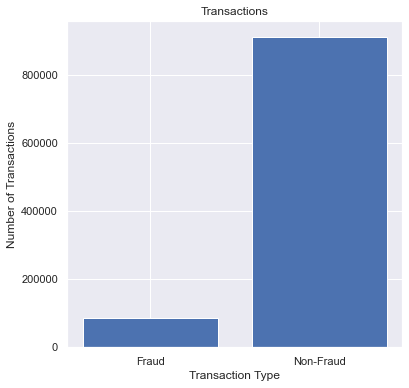

In [1168]:
values = ['Fraud','Non-Fraud']

plt.figure(figsize=(6,6))
plt.bar(values,[(transaction.fraud ==1).sum(),(transaction.fraud ==0).sum()])
plt.xlabel("Transaction Type")
plt.ylabel("Number of Transactions")
plt.title("Transactions")


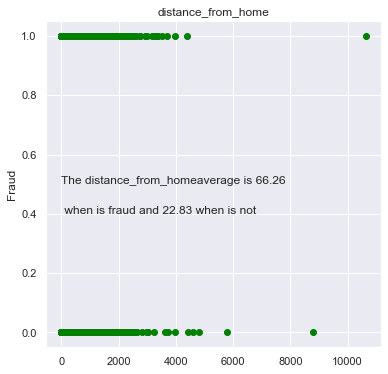

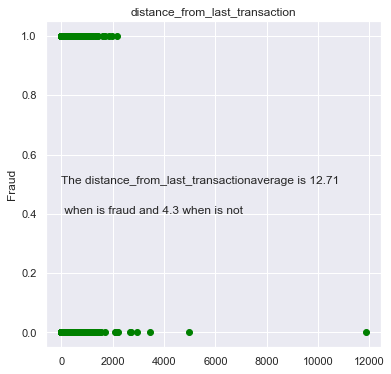

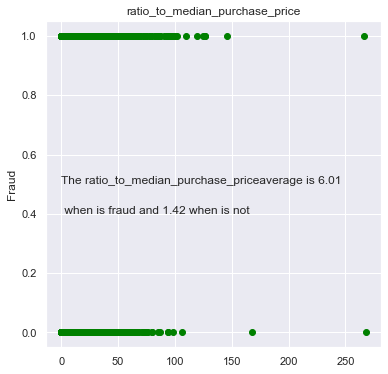

In [1171]:
numerical_columns = ['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']

for i in numerical_columns:
    plt.figure(figsize=(6,6))
    plt.scatter(data = transaction, x = i, y = 'fraud',c = 'green')
    plt.title(i)
    plt.text(0,0.5,"The " + i + "average is " + str(round(transaction[i][transaction.fraud == 1].mean(),2)) )
    plt.text(0,0.4," when is fraud and " + str(round(transaction[i][transaction.fraud == 0].mean(),2)) + ' when is not')
    plt.ylabel('Fraud')
    plt.show()
    


In [1173]:
#Fraud dataframe

fraud = transaction.copy()
fraud = fraud[fraud.fraud == 1]
fraud = fraud.drop('fraud',axis=1)

In [1174]:
#Non-Fraud dataframe

non_fraud = transaction.copy()
non_fraud = non_fraud[non_fraud.fraud == 0]
non_fraud = non_fraud.drop('fraud',axis=1)

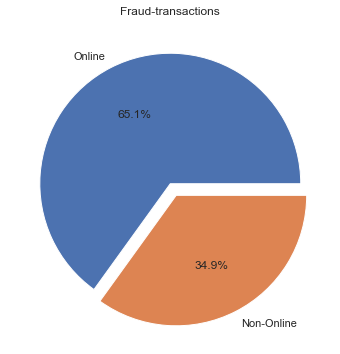

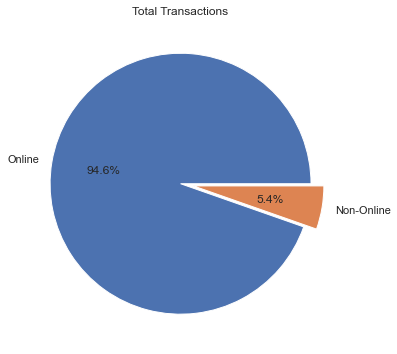

In [1177]:
categories = ['Online','Non-Online']

plt.figure(figsize=(6,6))
plt.pie(x = transaction.online_order.value_counts(),
                              labels = categories,
                              explode = (0,0.1),
                              autopct='%1.1f%%')
plt.title('Fraud-transactions')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(x = fraud.online_order.value_counts(),
                              labels = categories,
                              explode = (0,0.1),
                              autopct='%1.1f%%')
plt.title('Total Transactions')
plt.show()

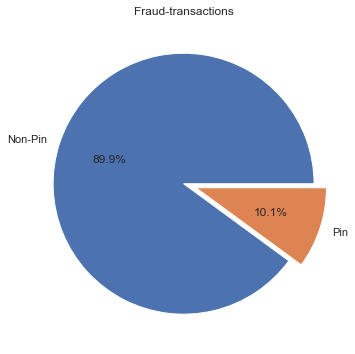

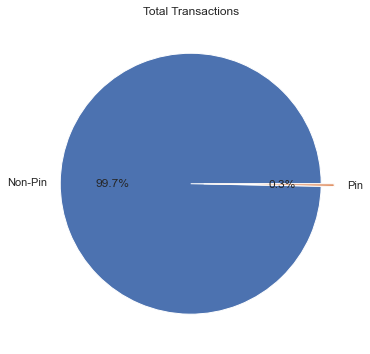

In [1179]:
categories = ['Non-Pin','Pin']

plt.figure(figsize=(6,6))
plt.pie(x = transaction.used_pin_number.value_counts(),
                              labels = categories,
                              explode = (0,0.1),
                              autopct='%1.1f%%')
plt.title('Fraud-transactions')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(x = fraud.used_pin_number.value_counts(),
                              labels = categories,
                              explode = (0,0.1),
                              autopct='%1.1f%%')
plt.title('Total Transactions')
plt.show()

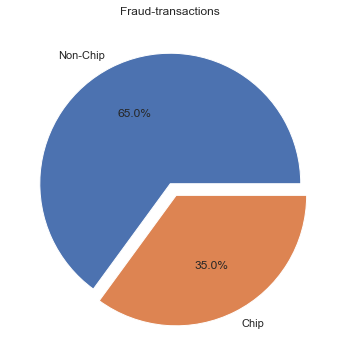

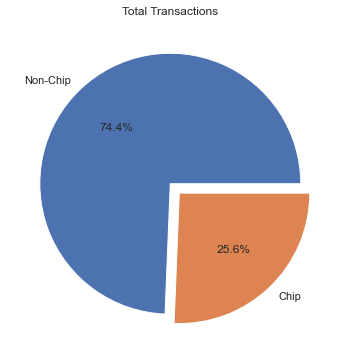

In [1180]:
categories = ['Non-Chip','Chip']

plt.figure(figsize=(6,6))
plt.pie(x = transaction.used_chip.value_counts(),
                              labels = categories,
                              explode = (0,0.1),
                              autopct='%1.1f%%')
plt.title('Fraud-transactions')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(x = fraud.used_chip.value_counts(),
                              labels = categories,
                              explode = (0,0.1),
                              autopct='%1.1f%%')
plt.title('Total Transactions')
plt.show()

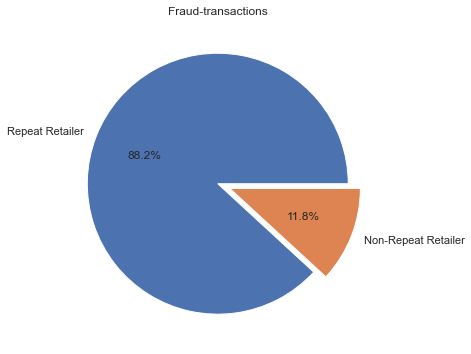

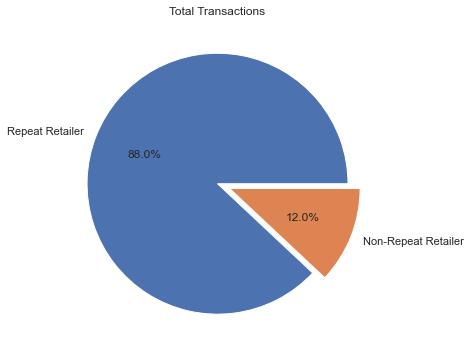

In [1181]:
categories = ['Repeat Retailer','Non-Repeat Retailer']

plt.figure(figsize=(6,6))
plt.pie(x = transaction.repeat_retailer.value_counts(),
                              labels = categories,
                              explode = (0,0.1),
                              autopct='%1.1f%%')
plt.title('Fraud-transactions')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(x = fraud.repeat_retailer.value_counts(),
                              labels = categories,
                              explode = (0,0.1),
                              autopct='%1.1f%%')
plt.title('Total Transactions')
plt.show()

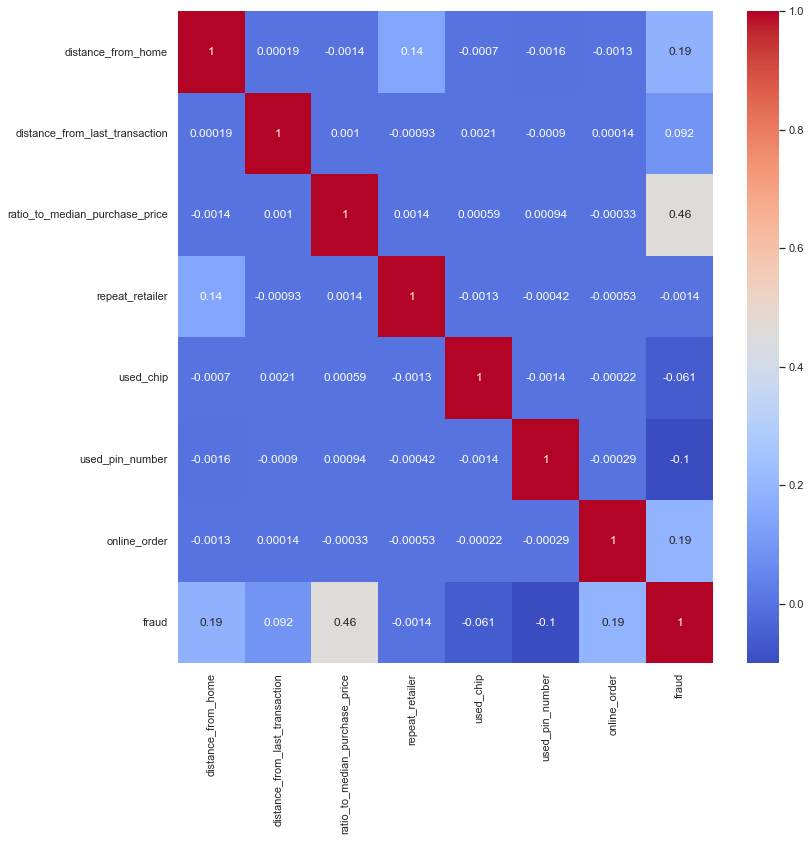

In [1195]:
transaction.corr()

sns.heatmap(transaction.corr(),
            annot=True,
           cmap="coolwarm")

sns.set(rc={"figure.figsize":(12,12)})
plt.show()

In [1196]:
#Data Split into Train and Test

features = transaction.columns[0:7]

X = transaction[features]
y = transaction['fraud']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state = 10)

In [1197]:
#Logistic Regression using Statsmodel package to check significance tests
import statsmodels.api as sm

#add constant and fit the model
X_train_const = sm.add_constant(X_train, prepend=True)  #Add constant to model
X_test_const = sm.add_constant(X_test, prepend=True)  #Add constant to model
logistic_model = sm.Logit(exog = X_train_const , endog = y_train).fit()

logistic_model.summary()

Optimization terminated successfully.
         Current function value: 0.136325
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  fraud   No. Observations:               800000
Model:                          Logit   Df Residuals:                   799992
Method:                           MLE   Df Model:                            7
Date:                Tue, 13 Sep 2022   Pseudo R-squ.:                  0.5405
Time:                        20:03:21   Log-Likelihood:            -1.0906e+05
converged:                       True   LL-Null:                   -2.3732e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -10.3243      0.049   -212.150      0.000     -10.420     -10.229
distance_from_home                 0.0152   9.28e-05    163.743      0.000       0.015       0.015
distance_from_last_transaction     0.0251      0.000     93.798      0.000       0.025       0.026
ratio_to_median_purchase_price     0.8571      0.003    271.688      0.000       0.851       0.863
repeat_retailer                   -0.6085      0.018    -34.523      0.000      -0.643      -0.574
used_chip                         -1.0423      0.014    -76.546      0.000      -1.069      -1.016
used_pin_number                  -13.9029      0.178    -78.130      0.000     -14.252     -13.554
online_order                       6.6185      0.041    159.561      0.000       6.537       6.700
==================================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [1198]:
#The p-values of the coeficients are significants, so all of them are significant to fit the model. 

#Those ones with a positive coefficient impact has potitively impact in the odds and the negatives ones, the opposite.

print(pd.DataFrame(logistic_model.params[1:][np.exp(logistic_model.params[1:])>1].index, columns = ["Positive impact in odds"]))
print()
print(pd.DataFrame(logistic_model.params[1:][np.exp(logistic_model.params[1:])<1].index, columns = ["Negative impact in odds"]))

          Positive impact in odds
0              distance_from_home
1  distance_from_last_transaction
2  ratio_to_median_purchase_price
3                    online_order

  Negatives impact in odds
0          repeat_retailer
1                used_chip
2          used_pin_number


In [1199]:
(round(np.exp(logistic_model.params[1:])-1))*100

#Some features have more impact in the odds. distance_from_home and distance_from_last_transaction push the odds up when they take higher values, but the increment is slowly (less than 3% when they increase one unit).
#On an increment of a unit of ratio_to_median_purchase_price, the odds of fraud increase in 135.64%
#A repeat of retailer it implies a reduction in 45.5% the odds of fraud
#If used a chip the reduction is 64% and 100% if was trhough pin number
#If was online order the odds of fraud increase in 74.780%


distance_from_home                    0.0
distance_from_last_transaction        0.0
ratio_to_median_purchase_price      100.0
repeat_retailer                      -0.0
used_chip                          -100.0
used_pin_number                    -100.0
online_order                      74800.0
dtype: float64

In [1219]:
#Logistic Regression using Sklearn package to fit the model and validated by Cross-Validation
#The scoring metric used to check the quality of the model is f1 (it means a mixing between the recall and the presicion).


from sklearn.model_selection import cross_val_score

logistic_scores = cross_val_score(LogisticRegression(max_iter=1000),
                         X_train_const,
                         y_train,
                         cv = 10,
                         scoring = 'f1'
                        )

print('The f1 mean score after used 10 Cross-Validation in the Logistic Regression Model is ' + str(round(logistic_scores.mean(),2)))

logistic_model_final = LogisticRegression(max_iter=1000)
logistic_model_final.fit(X_train_const,y_train)

The f1 mean score after used 10 Cross-Validation in the Logistic Regression Model is 0.72


LogisticRegression(max_iter=1000)

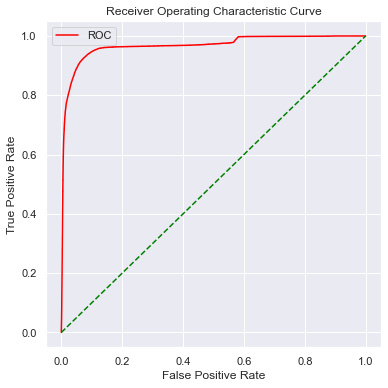

,Logistic Regression Metrics
Precision,0.895228
Accuracy,0.959010
F1,0.718262
Recall,0.599713


In [1232]:
#Logistic Regression Prediction and Model Check using ROC and AUC metrics.


from sklearn.metrics import roc_curve

plt.figure(figsize=(6,6))
prob = logistic_model_final.predict_proba(X_test_const)
prob = prob[:,1]
fper, tper, thresholds = roc_curve(y_test, prob)
plot_roc_curve(fper, tper)

from sklearn.metrics import roc_auc_score

'The AUC metric for the Logistic Regression Model is '+ str(round(roc_auc_score(y_test,logistic_model_final.predict(X_test_const)),3)*100) + '%'

metrics_(y_test,logistic_model_final.predict(X_test_const), "Logistic Regression Metrics")

In [1233]:
#KNN model: Is a non-parametric model where assign a categorical value ,in this case, given the similarity of the data

knn_scores= pd.DataFrame(index = range(0, 5), columns=['K','F1'])

k = [1,3,5,15,30]
j = 0

from sklearn.neighbors import  KNeighborsClassifier

for i in k:
    
    knn = KNeighborsClassifier(n_neighbors = i)

    knn_model_selection = cross_val_score(knn,
                                          X_train,
                                          y_train,
                                          cv = 10,
                                          scoring = 'f1',
                                         n_jobs = -1)
    
    knn_scores.loc[j,'F1'] = knn_model_selection.mean()
    
    knn_scores.loc[j,'K'] = i
    
    j = j+1

Text(0.5, 1.0, 'KNN Selection Model by K')

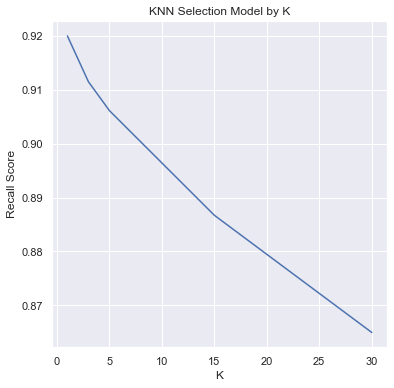

In [1236]:
#The F1 metric is decreasing while the K parameter is higher. For the final model a k=5 is taken in order to get a high F1 metric and to avoid the overfitting
plt.figure(figsize=(6,6))
plt.plot(knn_scores.K,knn_scores.F1)
plt.xlabel("K")
plt.ylabel("F1 Score")
plt.title("KNN Selection Model by K")

In [1238]:
#KNN final model
knn_model_final = KNeighborsClassifier(n_neighbors = 5)
knn_model_final.fit(X_train,y_train)

KNeighborsClassifier()

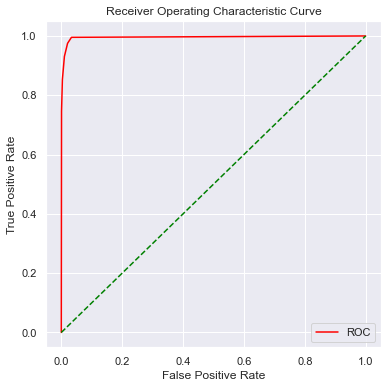

The AUC metric for the KNN Model is 96.0%


,KNN Metrics
Precision,0.896931
Accuracy,0.984660
F1,0.913602
Recall,0.930904


In [1243]:
#KNN Prediction and Model Check using ROC and AUC metrics.

plt.figure(figsize=(6,6))
prob = knn_model_final.predict_proba(X_test)
prob = prob[:,1]
fper, tper, thresholds = roc_curve(y_test, prob)
plot_roc_curve(fper, tper)



print('The AUC metric for the KNN Model is '+ str(round(roc_auc_score(y_test,knn_model_final.predict(X_test)),3)*100) + '%')

metrics_(y_test,knn_model_final.predict(X_test), "KNN Metrics")



In [1245]:
#Random Forest: Another model for prediction class working as ensamble to reduce the variance

from sklearn.ensemble import RandomForestClassifier
import multiprocessing

#To start the parameter selections, the number of trees will be evaluated.  
randomforest_scores= pd.DataFrame(index = range(0, 4), columns=['Paremeter','F1'])
j = 0
k = [100,250,500,1000]

for i in k:
    randomforest =  RandomForestClassifier(n_estimators = i,
                                           criterion='gini',
                                           n_jobs=multiprocessing.cpu_count() - 1,
                                           max_features='sqrt',
                                           min_samples_split=10,
                                           min_samples_leaf=20,
                                           bootstrap=True,
                                           random_state = 1234)

    randomforest_model_selection = cross_val_score(randomforest,
                                             X_train,
                                             y_train,
                                             cv = 10,
                                             n_jobs = -1,
                                             scoring = 'f1')
    
    randomforest_scores.loc[j,"F1"] = randomforest_model_selection.mean()
    randomforest_scores.loc[j,"Parameter"] = i
    
    j = j+1

Text(0.5, 1.0, 'Random Forest Model by number of trees')

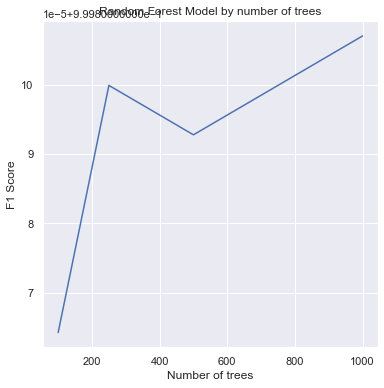

In [1250]:
#The F1 metric is ascending while the the number of trees is higher. For the final model a i=1000 is chosen
plt.figure(figsize=(6,6))
plt.plot(randomforest_scores.Parameter,randomforest_scores.F1)
plt.xlabel("Number of trees")
plt.ylabel("F1 Score")
plt.title("Random Forest Model by number of trees")

In [1252]:
#Random Forest with 1000 trees and a grid of parameters to select the best model.
from sklearn.model_selection import RepeatedKFold

#Once the most important hyperparameters are set let's perform a grid to select other hyperparameters.

ranfomforest_grid = {'max_features' : [3,7],
                    'max_depth' : [3,5],
                    }


randomforest_model_selection = GridSearchCV(
    
    estimator  = RandomForestClassifier(
                 n_estimators=1000,
                 criterion='gini',
                 bootstrap=True,
                 random_state = 1234),
    param_grid = ranfomforest_grid,
    scoring    = 'f1',
    n_jobs     = multiprocessing.cpu_count() - 1,
    cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
    verbose    = 1,
    return_train_score = True
    )



Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=1, n_splits=3, random_state=123),
             estimator=RandomForestClassifier(n_estimators=1000,
                                              random_state=1234),
             n_jobs=7, param_grid={'max_depth': [3, 5], 'max_features': [3, 7]},
             return_train_score=True, scoring='f1', verbose=1)

In [1256]:
#Best Random Forest Model
randomforest_model_final = randomforest_model_selection.best_estimator_.fit(X_train,y_train)

Text(0, 0.5, 'Feature')

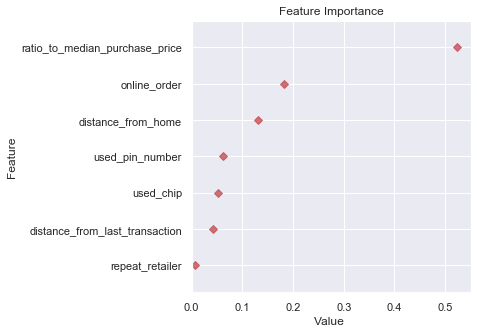

In [1263]:
#Random forest model allows to represent graphicly the feature importance in the model

random_forest_FeatImp = pd.DataFrame({'feature' : X_train.columns,
             'importance' : randomforest_model_final.feature_importances_}).sort_values(['importance'], ascending=True)

plt.figure(figsize = (5,5))
plt.barh(
    random_forest_FeatImp['feature'],
    random_forest_FeatImp['importance'],

    align='center',
    alpha=0
)
plt.plot(
    random_forest_FeatImp['importance'],
    random_forest_FeatImp['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)

plt.title('Feature Importance')
plt.xlabel("Value ")
plt.ylabel("Feature")


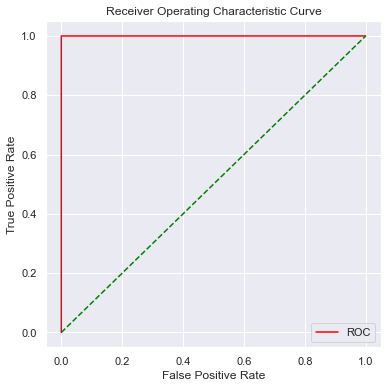

The AUC metric for the Random Forest Model is 100.0%


,randomforest_model_final Metrics
Precision,1.000000
Accuracy,0.999975
F1,0.999857
Recall,0.999713


In [1264]:
#Random Forest Prediction and Model Check using ROC and AUC metrics.

plt.figure(figsize=(6,6))
prob = randomforest_model_final.predict_proba(X_test)
prob = prob[:,1]
fper, tper, thresholds = roc_curve(y_test, prob)
plot_roc_curve(fper, tper)


print('The AUC metric for the Random Forest Model is '+ str(round(roc_auc_score(y_test,randomforest_model_final.predict(X_test)),3)*100) + '%')

metrics_(y_test,randomforest_model_final.predict(X_test), "randomforest_model_final Metrics")




In [1298]:
from sklearn.ensemble import GradientBoostingClassifier

#GBM (Gradient Boost Machine): Another method is the GBM available in scikit learn.


gbm_scores= pd.DataFrame(index = range(0, 1), columns=['Paremeter','F1'])
j = 0
k = [0.01]

for i in k:
    gbm =  GradientBoostingClassifier( n_estimators = 1000,
        criterion         = 'squared_error',
        max_features= 3 ,
        max_depth=10,
        learning_rate=0.01,
        random_state = 123,
        verbose = 1)

    gbm_model_selection = cross_val_score(gbm,
                                             X_train,
                                             y_train,
                                             cv = 3,
                                             n_jobs = multiprocessing.cpu_count() - 1,
                                             scoring = 'f1')
    
    gbm_scores.loc[j,"F1"] = gbm_model_selection.mean()
    gbm_scores.loc[j,"Parameter"] = i
    
    j = j+1

In [1299]:
'The F1 metric for the GBM model is '+ str(round(gbm_scores.F1.mean(),2)*100) +'%'

'The F1 metric for the GBM model is 100.0%'

In [1300]:
#Best Model

gbm_model_final =  GradientBoostingClassifier(n_estimators = 1000,
        criterion         = 'squared_error',
        max_features= 3 ,
        max_depth=10,
        learning_rate=0.01,
        random_state = 123,
        verbose = 1)

gbm_model_final.fit(X_train, y_train)


      Iter       Train Loss   Remaining Time 
         1           0.5734           16.38m
         2           0.5556           20.37m
         3           0.5393           18.88m
         4           0.5243           17.52m
         5           0.5105           19.42m
         6           0.4975           20.77m
         7           0.4855           20.21m
         8           0.4742           21.40m
         9           0.4635           21.73m
        10           0.4534           22.43m
        20           0.3738           24.64m
        30           0.3175           27.95m
        40           0.2745           30.53m
        50           0.2396           31.67m
        60           0.2106           32.62m
        70           0.1860           33.33m
        80           0.1651           33.76m
        90           0.1468           33.87m
       100           0.1309           34.10m
      Iter       Train Loss   Remaining Time 
         1           0.5738           11.34m
        

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.01,
                           max_depth=10, max_features=3, n_estimators=1000,
                           random_state=123, verbose=1)

Text(0, 0.5, 'Feature')

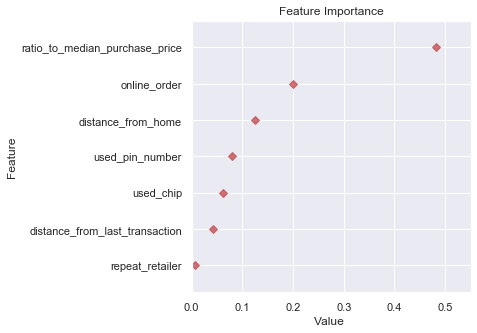

In [1302]:
#Random forest model allows to represent graphicly the feature importance in the model

gbm_FeatImp = pd.DataFrame({'feature' : X_train.columns,
             'importance' : gbm_model_final.feature_importances_}).sort_values(['importance'], ascending=True)

plt.figure(figsize = (5,5))
plt.barh(
    random_forest_FeatImp['feature'],
    random_forest_FeatImp['importance'],

    align='center',
    alpha=0
)
plt.plot(
    gbm_FeatImp['importance'],
    gbm_FeatImp['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)

plt.title('Feature Importance')
plt.xlabel("Value ")
plt.ylabel("Feature")

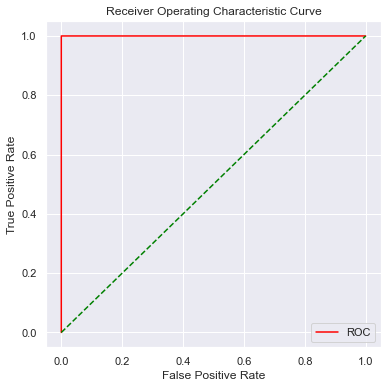

The AUC metric for the GBM Model is 100.0%


,gbm_model_final Metrics
Precision,1.000000
Accuracy,0.999995
F1,0.999971
Recall,0.999943


In [1303]:
#GBM Prediction and Model Check using ROC and AUC metrics.

plt.figure(figsize=(6,6))
prob = gbm_model_final.predict_proba(X_test)
prob = prob[:,1]
fper, tper, thresholds = roc_curve(y_test, prob)
plot_roc_curve(fper, tper)


print('The AUC metric for the GBM Model is '+ str(round(roc_auc_score(y_test,gbm_model_final.predict(X_test)),3)*100) + '%')

metrics_(y_test,gbm_model_final.predict(X_test), "gbm_model_final Metrics")



In [1330]:
gbm_auc = round(roc_auc_score(y_test,gbm_model_final.predict(X_test)),2)*100
randomforest_auc = round(roc_auc_score(y_test,randomforest_model_final.predict(X_test)),2)*100
knn_auc = round(roc_auc_score(y_test,knn_model_final.predict(X_test)),2)*100
logit_auc = round(roc_auc_score(y_test,logistic_model_final.predict(X_test_const)),2)*100

gbm_f1 = round(f1_score(y_test,gbm_model_final.predict(X_test)),4)*100
randomforest_f1 = round(f1_score(y_test,randomforest_model_final.predict(X_test)),4)*100
knn_f1 = round(f1_score(y_test,knn_model_final.predict(X_test)),4)*100
logit_f1 = round(f1_score(y_test,logistic_model_final.predict(X_test_const)),4)*100

#Best Model selection
print(pd.DataFrame({
    "Model": ['Logit','KNN','Random Forest','GBM'],
    "AUC": [logit_auc,knn_auc,randomforest_auc,gbm_auc],
    "F1": [logit_f1,knn_f1,randomforest_f1,gbm_f1]
}))

print()
print('The model selected is XGB ')
print()
print(pd.DataFrame(confusion_matrix(y_test,gbm_model_final.predict(X_test))))

           Model    AUC      F1
0          Logit   80.0   71.83
1            KNN   96.0   91.36
2  Random Forest  100.0   99.99
3            GBM  100.0  100.00

The model selected is XGB 

        0      1
0  182575      0
1       1  17424
